In [1]:
import numpy as np
from sympy import symbols, Symbol, diff, Eq, solve, integrate
import pandas as pd
import matplotlib.pyplot as plt

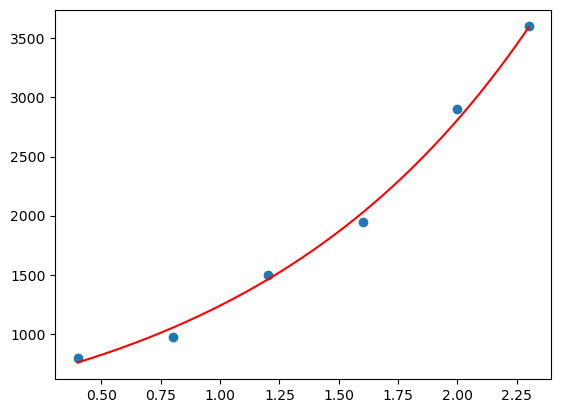

In [4]:
#1. MNMK
xi = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.3])
yi = np.array([800, 975, 1500, 1950, 2900, 3600])
size = xi.size

#y = a * 10^(b*x) ---> ln10(y) = ln10(a) +b*x = c + b*x 

c,b = symbols('c,b')

def f(x, c, b):
    return c + b*x

def phi(c, b):
    phi = 0
    for i in range(size):
        phi += ((f(xi[i], c, b) - np.log10(yi[i])) ** 2)
    return phi

equations = [Eq(diff(phi(c,b),c),0),
             Eq(diff(phi(c,b),b),0)]

sol = solve(equations)

def expr_function(x):
    return np.power(10, float(sol[c]) + float(sol[b]) * x)

x_axis = np.linspace(0.4, 2.3, 1000)
plt.scatter(xi,yi)
plt.plot(x_axis, expr_function(x_axis), color = 'red')
plt.show()

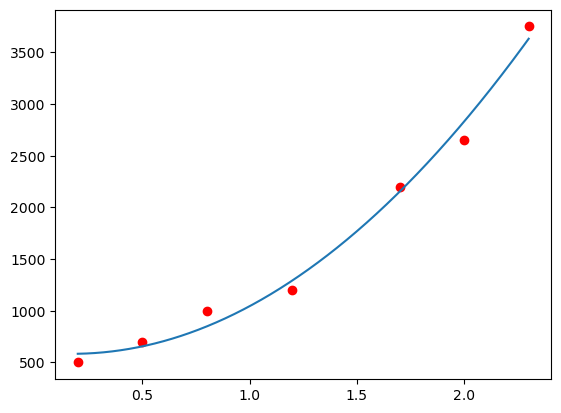

In [3]:
#2.MNMK vector-matrix form

x =  np.array([0.2, 0.5, 0.8, 1.2, 1.7, 2, 2.3])
y = np.array([500, 700, 1000, 1200, 2200, 2650, 3750])
size = x.size
n = 3

a,b,c = symbols('a, b, c')

def f(x, a, b, c):
    return a*(x ** 2) + b*x + c

def summary_matrix(row_idx, coll_idx):
    sum = 0
    for i in range(size):
        sum += (x[i] ** (row_idx + coll_idx))
    return sum


def create_matrix():
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(summary_matrix(i, j))
        matrix.append(row)
    return matrix

matrix = create_matrix()

def summary_coll(pow_x):
    sum = 0
    for i in range(size):
        sum += (y[i] * (x[i] ** pow_x))
    return sum


def create_coll():
    coll = []
    for i in range(n):
        coll.append(summary_coll(i))
    return coll

coll = create_coll()

def polynomial(result, x):
    poly = 0
    for i in range(result.size):
        poly += (result[i] * x ** i)
    return poly
    
def least_squares_matrix(x):
    result = np.linalg.solve(matrix, coll)
    poly = polynomial(result, x)
    return poly

x_axis = np.linspace(x[0], x[-1], 1000)
plt.scatter(x, y, color = 'red')
plt.plot(x_axis, least_squares_matrix(x_axis))
plt.show()

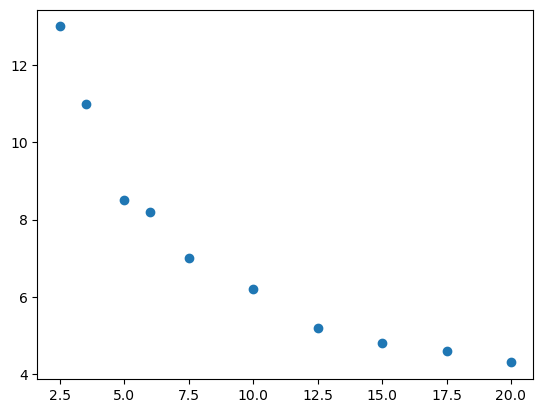

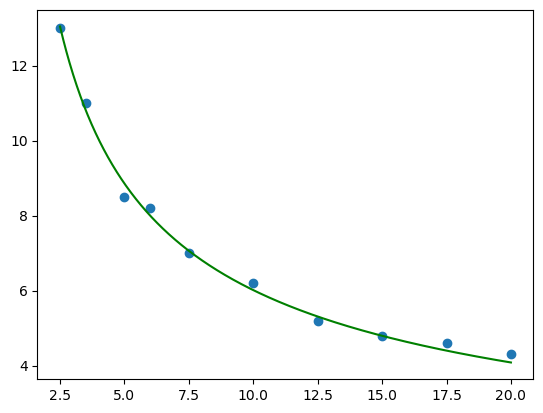

6.3762040445012245


In [13]:
#3
x = np.array([2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
y = np.array([13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3])
plt.scatter(x, y)
plt.show()

#y = a*x^b --> ln(y) = ln(a*x^b) = ln(a) + b*ln(x) = c + b*ln(x)
b,c = symbols('b, c')

def f(x, b, c):
    return c + b * np.log(x)

def phi(b, c):
    phi = 0
    for i in range(size):
        phi += (f(x[i], b, c) - np.log(y[i])) ** 2
    return phi

equations = [Eq(diff(phi(b, c), b), 0),
             Eq(diff(phi(b, c), c), 0)]

sol = solve(equations)

def expr_func(x):
    return np.exp(float(sol[c]) + float(sol[b]) * np.log(x))

x_axis = np.linspace(x[0], x[-1], 1000)
plt.plot(x_axis, expr_func(x_axis), color = 'green')
plt.scatter(x, y)
plt.show()

print(expr_func(9))

In [ ]:
#5
c = np.array([0.5, 0.8, 1.5, 2.5, 4.0])
k = np.array([1.1, 2.4, 5.3, 7.6, 8.9])
n = c.size

# 1 / y = cs / (k_max * (c ** 2)) + 1 / k_max
# e = 1 / y - cs / (k_max * (c ** 2)) - 1 / k_max
# e = 1 / y - A / c**2 - B


In [22]:
#10
import numpy as np
from sympy import cot, symbols, Symbol, diff, Eq, solve, integrate
import pandas as pd
import matplotlib.pyplot as plt
def f(x):
    return 1 - cot(x)

n,x = symbols('n, x')

a = -1
b = -2

derivateI = diff(f(x),x)
derivateII = diff(derivateI,x)
derivateIII = diff(derivateII,x)
derivateIV = diff(derivateIII,x)

In [36]:
derivateII.subs(x, a)

-(-2 - 2*cot(1)**2)*cot(1)

In [32]:
#rectangles
R_rectangles = - derivateII.subs(x, a) * (b - a) ** 3 / (24 * n**2)
R_rectangles

-(-2 - 2*cot(1)**2)*cot(1)/(24*n**2)

In [41]:
n = int(np.ceil(np.sqrt((2 + 2 * 1 / np.tan(1) ** 2) * 1/np.tan(1) * 10**5 / 24)))
n

87